In [1]:
%matplotlib inline
from matplotlib import style, ticker
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station


In [8]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
measure=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(measure)



('2017-08-23',)


<Axes: xlabel='Date'>

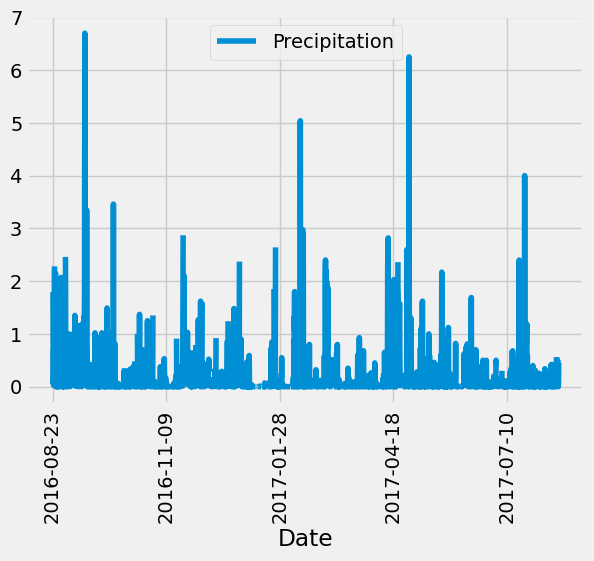

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 



# Calculate the date one year from the last date in data set.

year_range = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
query = session.query(Measurement.date, Measurement.prcp).\
                            filter(Measurement.date >= year_range).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
df=pd.DataFrame(query)

df=df.rename(columns={ 'date': 'Date', 'prcp': 'Precipitation'})

# Sort the dataframe by date
sorted_df=df.sort_values('Date')


sorted_df.plot('Date', 'Precipitation', rot=90)





In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary=sorted_df['Precipitation'].describe()
summary_df = pd.DataFrame(summary, columns=["Precipitation"])
summary_df

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
no_of_station= session.query(Measurement.station).distinct().count()
no_of_station

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
list_of_station= session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
list_of_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_temp=session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
station_temp

[(54.0, 85.0, 71.66378066378067)]

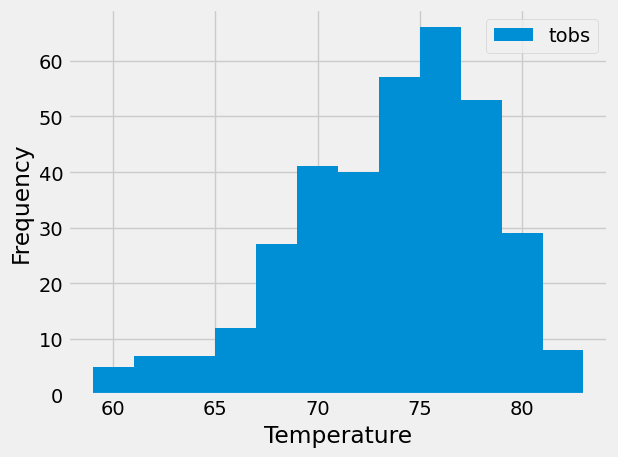

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histograms

year_range = dt.date(2017, 8, 23) - dt.timedelta(days=365)

station_year_temp=session.query(Measurement.tobs).filter(Measurement.station=='USC00519281').\
                        filter(Measurement.date >= year_range).all()


temp_df=pd.DataFrame(station_year_temp)

temp_df.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.tight_layout()

# print(date_l)
# print(start_date2)


# Close Session

In [16]:
# Close Session
session.close()